In [129]:
from datetime import datetime
print(f'Päivitetty {datetime.now().strftime("%d.%m.%Y")} / Tatu Erkinjuntti')

Päivitetty 17.10.2024 / Tatu Erkinjuntti


Oppillaan kommentti: Itse en pidä yhdysvaltaistyylisestä päiväyksen formatoinnista kun ohjelma suoritetaan/luetaan tilanteessa jossa lukija on tottunut "perinteiseen" formatointiin => "day"."month"."year", kuten Suomessa yleisesti käytössä. Tästä syystä datetime formatointi on päivitetty tehtävässäni.

# Tehtävä 1.

## Kuvaus

Tehtävässä 1 on tarkoituksena soveltaa kuvailevan ja selittävän analytiikan menetelmiä valitsemiisi datoihin. Voit käyttää alempana mainittuja data-paketin datoja tai omaan työhön tai kiinnnostuksen kohteisiin liittyviä datoja. Käytä tehtävässä vähintään kahta eri datasettiä ja huolehdi että saat mukaan sekä kategorisia että määrällisiä muuttujia.

## Tehtävän kriteerit

Täysiin pisteisiin (5) pääset soveltamalla kaikkia esimerkkimuistioissa esitettyjä menetelmiä:

 - frekvenssitaulukot,
 - luokitellut jakaumat,
 - tilastolliset tunnusluvut, ristiintaulukoinnit,
 - tunnuslukujen vertailut ja korrelaatiot
 - tulosten visualisointeja.




## Tehtävän alustus

Haetaan tarvittavat kirjastos ja määritellään käytetyt data-aineistot. Itse teen tämän aina kerralla ohjelman alussa, näin yhdellä silmäyksellä näkee ohjelman riippuvaisuudet. Jos käytössä olisi pysyviä muuttujia, tulisi ne myös alustaa samalla.  

In [130]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

# Kaavioiden prosenttiakselin muotoiluun
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

sns.set_style('dark')

data_titanic = 'Data/titanic_new.xlsx'
data_kunnat = 'Data/kunnat.xlsx'
data_sales = "sales_data_sample.csv"

## Titanic

Aloitan tehtävän tutkimalla 1912 uponeen matkustajalaivan matkustajia käsitelevää data-pakettia. 

In [131]:
## Luetaan excel-tiedosto
df_titanic = pd.read_excel(data_titanic)
## Tarkastellaan mitä datapaketti sisältää, samalla nähdään rivien ja sarakkeiden lukumäärä.

In [132]:
## Tarkastellaan seuraavaksi käytössä olevia tietotyyppejä.
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1310 non-null   int64  
 1   pclass      1310 non-null   int64  
 2   survived    1310 non-null   int64  
 3   name        1310 non-null   object 
 4   sex         1310 non-null   object 
 5   age         1047 non-null   float64
 6   sibsp       1310 non-null   int64  
 7   parch       1310 non-null   int64  
 8   ticket      1310 non-null   object 
 9   fare        1309 non-null   float64
 10  cabin       296 non-null    object 
 11  embarked    1308 non-null   object 
 12  boat        487 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   746 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.6+ KB


Aloitetaan tutkimalla yleisiä tilastollisia tunnuslukuja suhteessa matkustajamäärää, näitä on sukupuoli ja ikä jakauma

In [133]:
# Aloitetaan tutkimalla sukupuolijakaumaa, muutetaan ensiksi taulukosta muutaman sarakkeen nimi kuvaavammaksi Suomenkielellä-
df_titanic = df_titanic.rename(columns={'sex':'sukupuoli','pclass':'matkustajaluokka'})
df_titanic.head() # Tarkastetaan vain ensimmäiset rivit

,Unnamed: 0,matkustajaluokka,survived,name,sukupuoli,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Haghish, E. F.",male,30.0000,0,0,24058,26.5500,A1 Special,S,1,NaN,"Odense, Denmark"
1,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


In [134]:
# Tarkastetaan ensiksi sukupuolijakauma.
# Frekvenssi-sarakkeen otsikkona käytetään yleisesti f-kirjainta.
df_titanic_gender = pd.crosstab(df_titanic['sukupuoli'], columns='f')
# Poistetaan 'Col_0' otsikko ensimmäisestä sarakkeesta.
df_titanic_gender.columns.name=''
# Suomennetaan sukupuolet
df_titanic_gender.index = ['Nainen', 'Mies']
# Lisätään mukaan prosentti-sarake jotta määrällinen ero on selkeämpi.
n = df_titanic_gender['f'].sum()
df_titanic_gender['%'] = df_titanic_gender['f']/n*100
# Lisätään vielä rivi jossa näytetään yhteenlaskettu määrä.
df_titanic_gender.loc['Yhteensä'] = df_titanic_gender.loc['Nainen':'Mies'].sum()
# Hieman siistitään ulkoasua, f-sareke ei tarvitse erikseen desimaalia ja % sarake voisi olla kahden desimaalin tarkkuudella..
df_titanic_gender.style.format({'f':'{:.0f}', '%':'{:.1f} %'})

,f,%
Nainen,466,35.6 %
Mies,844,64.4 %
Yhteensä,1310,100.0 %


Jakauma sukupuolten välillä nyt selkeä mutta tehdään tästä vielä helppolukuinen pylväs diagrammi.

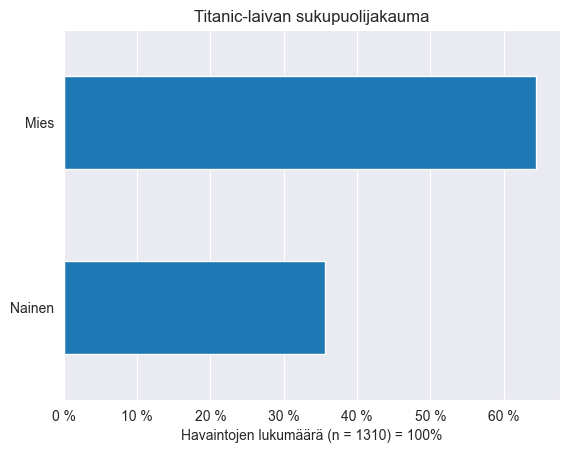

In [135]:
# luodaan pylväsdiagrammin sukupuolten prosenttisuhteista.
df_titanic_gender.drop('Yhteensä')['%'].plot(kind='barh', title='Titanic-laivan sukupuolijakauma', xlabel=(f'Havaintojen lukumäärä (n = {n}) = 100%'), ylabel='')
# määritetään myös x-akselilta lähtevä taustaviivoitus.
plt.grid(axis='x')
# määritellään vielä x-akselin lukuihin prosentit.
plt.gca().xaxis.set_major_formatter(ticks)

Tutkitaan seuraavaksi ikä matkustajien ikä jakaumaa. 